# Projet de fin d'étude - Parties finales (catégorisation/classification client - prédiction (ML))
## Camille Bouberka - Armand Dusart - Jules Enguehard
## Encadrant : Martin Nasse
## 2020-2021 - ESME Sudria 

In [8]:
import pandas as pd
import numpy as np

# 4 - Catégorisation des clients (recherche de labels)

In [9]:
df = pd.read_csv("Online_Retails_Catégorisation.csv", sep = ';')

df.head(10)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CA,Catégorie
0,17850,536365,85123A,"['hanging', 'heart', 'light', 'holder']",6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Objets de creation
1,17850,536365,71053,"['metal', 'lantern']",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Objets de creation
2,17850,536365,84406B,"['cupid', 'heart', 'coat', 'hanger']",8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Objets artistiques
3,17850,536365,84029G,"['knitted', 'union', 'flag', 'hot', 'water', '...",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Contenants
4,17850,536365,84029E,"['woolly', 'hottie', 'heart']",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Objets artistiques
5,17850,536365,22752,"['babushka', 'nesting', 'box']",2,2010-12-01 08:26:00,7.65,United Kingdom,15.30,Objets artistiques
6,17850,536365,21730,"['glass', 'star', 'frosted', 'light', 'holder']",6,2010-12-01 08:26:00,4.25,United Kingdom,25.50,Contenants
7,17850,536366,22633,"['hand', 'warmer', 'union', 'jack']",6,2010-12-01 08:28:00,1.85,United Kingdom,11.10,Cadeaux pour evenements
8,13047,536367,84879,"['assorted', 'colour', 'bird', 'ornament']",32,2010-12-01 08:34:00,1.69,United Kingdom,54.08,Objets artistiques
9,13047,536367,22745,"['poppy', 'playhouse', 'bedroom']",6,2010-12-01 08:34:00,2.10,United Kingdom,12.60,Objets de creation


In [10]:
#On fait une nouvelle colonne dans le df pour affecter à chaque catégorie une numéro.
#travailler avec des numéros facilite le travail.
cat = list(pd.unique(df['Catégorie']))

i=0
dict_cat = {}
for key in cat:
    dict_cat[str(key)] = i
    i+=1
    
dict_cat

df['num_cat'] = df['Catégorie'].apply(lambda x : dict_cat[str(x)])
df

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CA,Catégorie,num_cat
0,17850,536365,85123A,"['hanging', 'heart', 'light', 'holder']",6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Objets de creation,0
1,17850,536365,71053,"['metal', 'lantern']",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Objets de creation,0
2,17850,536365,84406B,"['cupid', 'heart', 'coat', 'hanger']",8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Objets artistiques,1
3,17850,536365,84029G,"['knitted', 'union', 'flag', 'hot', 'water', '...",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Contenants,2
4,17850,536365,84029E,"['woolly', 'hottie', 'heart']",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Objets artistiques,1
...,...,...,...,...,...,...,...,...,...,...,...
400512,12680,581587,22613,"['spaceboy', 'napkin']",12,2011-12-09 12:50:00,0.85,France,10.20,Objets artistiques,1
400513,12680,581587,22899,"['child', 'apron', 'dolly', 'girl']",6,2011-12-09 12:50:00,2.10,France,12.60,Cadeaux pour evenements,3
400514,12680,581587,23254,"['childrens', 'cutlery', 'dolly', 'girl']",4,2011-12-09 12:50:00,4.15,France,16.60,Objets artistiques,1
400515,12680,581587,23255,"['childrens', 'cutlery', 'circus', 'parade']",4,2011-12-09 12:50:00,4.15,France,16.60,Contenants,2


In [11]:
#Changement du type de InvoiceDate de string à datetime pour faciliter les calculs suivants + suppression de l'H-m-s car pas utiles
import datetime
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0])
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d') )
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CA,Catégorie,num_cat
0,17850,536365,85123A,"['hanging', 'heart', 'light', 'holder']",6,2010-12-01,2.55,United Kingdom,15.30,Objets de creation,0
1,17850,536365,71053,"['metal', 'lantern']",6,2010-12-01,3.39,United Kingdom,20.34,Objets de creation,0
2,17850,536365,84406B,"['cupid', 'heart', 'coat', 'hanger']",8,2010-12-01,2.75,United Kingdom,22.00,Objets artistiques,1
3,17850,536365,84029G,"['knitted', 'union', 'flag', 'hot', 'water', '...",6,2010-12-01,3.39,United Kingdom,20.34,Contenants,2
4,17850,536365,84029E,"['woolly', 'hottie', 'heart']",6,2010-12-01,3.39,United Kingdom,20.34,Objets artistiques,1


### 4.1 - Création des indicateurs : récence, fréquence, panier moyen, value, catégorie de produit préférée, pays

quelques critères de distinction entre clients : 
- Recency : Le nb de jours depuis le dernier achat 
- Value : Le total dépensé 
- Value last trimester : combien le client a dépensé lors du dernier semestre 
- Frequency : Combien de facture(s)/client sur toute la période (peut être modifié pour établir sur une période donnée)
- AVG_Basket : Combien le client dépense en moyenne par facture
- Category : la catégorie de produit que le client préfère (dummies) 
- Country : Là d'où vient le client (dummies)

### 4.1.1 -  Country

In [12]:
#Country
df_country = df.groupby(by = ['CustomerID','Country'], as_index = True).apply(lambda x : x['Country'])
df_country

CustomerID  Country               
12347       Iceland         10526            Iceland
                            10527            Iceland
                            10528            Iceland
                            10529            Iceland
                            10530            Iceland
                                           ...      
18287       United Kingdom  286344    United Kingdom
                            286345    United Kingdom
                            312095    United Kingdom
                            312096    United Kingdom
                            312097    United Kingdom
Name: Country, Length: 400517, dtype: object

In [13]:
#Cellule pour checker l'ordre de nombre d'occurence des pays
df_countries = df.drop_duplicates(subset=['CustomerID'],keep='first')['Country']
dict_country = {}
for i in df_countries:
    if i not in dict_country.keys():
        dict_country[str(i)] = 1
        #print(dict)
    else :
        val = int(dict_country[str(i)])
        dict_country[str(i)] = val + 1
        #print(dict)
print(sorted(dict_country))

dict_country_sorted_keys = sorted(dict_country, key=dict_country.get, reverse=True)
for r in dict_country_sorted_keys:
    print(r, dict_country[r])

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']
United Kingdom 3902
Germany 94
France 87
Spain 27
Belgium 24
Switzerland 20
Portugal 19
Italy 14
Finland 12
Norway 10
Australia 9
Netherlands 9
Channel Islands 9
Austria 9
Japan 8
Denmark 8
Sweden 8
Cyprus 7
Poland 6
Greece 4
Canada 4
Unspecified 4
EIRE 3
Israel 3
United Arab Emirates 2
USA 2
Bahrain 2
Malta 2
Lithuania 1
Iceland 1
Singapore 1
Lebanon 1
Saudi Arabia 1
Czech Republic 1
Brazil 1
European Community 1
RSA 1


=> on ne garde que UK, Germany, France et other_country

In [14]:
#Cellule pour obtenir la liste des pays pour chaque consommateur

#On sommes les valeurs
all_values = []
for value in df_country:
    all_values.append(value)
all_values

CustomerID_list = []
Country_list = []
country = df_country.index[0][1]
customerId1 = df_country.index[0][0]
i=0
for customer in df_country.index:
    
    customerId2 = customer[0]
    val = all_values[i]
    
    if customerId2 != customerId1:
        if country == 'United Kingdom' or country == 'Germany' or country == 'France':
            Country_list.append(country)
        else : 
            Country_list.append('Other_country')
        CustomerID_list.append(customerId1)
        customerId1 = customerId2
        country = all_values[i]
        
    else :
        country = all_values[i]
        
    if i == 4316:
        CustomerID_list.append(customerId1)
        if country == 'United Kingdom' or country == 'Germany' or country == 'France':
            Country_list.append(country)
        else : 
            Country_list.append('Other_country')
        
    i+=1

### 4.1.2 - Last semestre CA / customer

In [15]:
#Last trimester
first_date = datetime.datetime.strptime(str(min((df['InvoiceDate']))).split(" ")[0], '%Y-%m-%d') 
last_date = datetime.datetime.strptime(str(max((df['InvoiceDate']))).split(" ")[0], '%Y-%m-%d') 
today = datetime.datetime.strptime(datetime.date.today().isoformat(), '%Y-%m-%d')

In [16]:
#On initialise le df du dernier semestre
df_lastTrimester = df.groupby(by = ['CustomerID','InvoiceNo'], as_index = True).apply(lambda x : sum(x['CA']) if ((last_date - max(x['InvoiceDate'])).days/30) < 4 else 0)


#On sommes les valeurs
all_values = []
for value in df_lastTrimester:

    all_values.append(value)
all_values

CustomerID_list = []
Somme_list = []
somme = 0
customerId1 = df_lastTrimester.index[0][0]
i=0
for customer in df_lastTrimester.index:
    
    customerId2 = customer[0]
    val = all_values[i]
    
    if customerId2 != customerId1:
        Somme_list.append(somme)
        CustomerID_list.append(customerId1)
        customerId1 = customerId2
        somme = 0
        
    else :
        somme += val
            
    if i == 4316:
        CustomerID_list.append(customerId1)
        Somme_list.append(somme)
        
    i+=1

### 4.1.3 - Recency

In [17]:
#Recence
df_recency = df.groupby(by = ['CustomerID'], as_index=True).apply(lambda x : (last_date - max(x['InvoiceDate'])).days)
df_recency

CustomerID
12347      2
12348     75
12349     18
12350    310
12352     36
        ... 
18280    277
18281    180
18282      7
18283      3
18287     42
Length: 4317, dtype: int64

### 4.1.4 - Frequency

In [18]:
#Frequence
df_frequency = df.sort_values(by=['CustomerID']).drop_duplicates(subset=['CustomerID','InvoiceDate'])
df_frequency_count =  df_frequency.groupby('CustomerID').CustomerID.count()

### 4.1.5 - Favorite category

In [19]:
#Initialisation pour trouver catégorie préférée

category = df.groupby(by = ['CustomerID', 'num_cat'], as_index=True).apply(lambda x : x['num_cat'].count())
category_max = category.groupby(by = ['CustomerID','num_cat']).max()

#Caculs pour trouver la catégorie préférée pour chaque customers
all_values = []
for value in category_max:
    all_values.append(value)
all_values

CustomerID_list = []
Category_list = []
Value_list = []
maximum = 0
customerId1 = category_max.index[0][0]
i=0
categorie = 0
for customer in category_max.index:
    
    customerId2 = customer[0]
    val = all_values[i]
    
    if customerId2 != customerId1:
        Value_list.append(maximum)
        maximum = 0
        
        CustomerID_list.append(customerId1)
        customerId1 = customerId2
        Category_list.append(categorie)
    else :
        if maximum < val:
            maximum = val
            categorie = customer[1]
            
    if i == 4316:
        Value_list.append(maximum)
        CustomerID_list.append(customerId1)
        Category_list.append(categorie)
        
    i+=1



In [20]:
#On vérifie quelles sont les catégories préférées:
cat_pref = list(pd.unique(Category_list))
print("les catégories préférées des consommateurs sont :")
for cle, valeur in dict_cat.items():
    if valeur in cat_pref:
        print("nom catégorie :",cle,", numéro catégorie :",valeur) 
   

les catégories préférées des consommateurs sont :
nom catégorie : Objets artistiques , numéro catégorie : 1
nom catégorie : Contenants , numéro catégorie : 2
nom catégorie : Cadeaux pour evenements , numéro catégorie : 3
nom catégorie : autres , numéro catégorie : 4


On remarque que la catégorie 0 := Objet de décoration a été supprimée car elle n'est jamais catégorie préférée d'un consommateur.

### 4.1.6 - Customer Value

In [21]:
#Combien a consommé chaque client 
value_custo = df.groupby(by = ['CustomerID'], as_index=True).apply(lambda x : sum(x['CA']))
value_custo

CustomerID
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
12352    1545.41
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Length: 4317, dtype: float64

### 4.1.7 -  Avg basket

In [22]:
#Dernier critère : La moyenne de ce qu'il dépense à chaque facture : panier moyen
panier_moy_par_facture = df.groupby(by = ['CustomerID', 'InvoiceNo'], as_index=True).apply(lambda x : sum(x['CA']))
panier_moy = panier_moy_par_facture.groupby(by = ['CustomerID']).mean()
panier_moy

CustomerID
12347     615.714286
12348     449.310000
12349    1757.550000
12350     334.400000
12352     220.772857
            ...     
18280     180.600000
18281      80.820000
18282      58.866667
18283     130.930000
18287     612.426667
Length: 4317, dtype: float64

### 4.1.8 formation complète du df avec indicateurs

#### On regroupe les indicateurs dans un df

In [23]:
#Matrice client initiale
dico_cat_client ={
       'Recency': df_recency.values, 
       'Value' : value_custo,
       'Value_last_semester' : Somme_list,
       'Frequency': df_frequency_count.values,
       'AVG_Basket' : panier_moy.values,

      }
     

df_cat_client = pd.DataFrame(dico_cat_client,index=df_recency.index, columns = ['Recency','Value','Value_last_semester','Frequency','AVG_Basket'])


print(df_cat_client)

            Recency    Value  Value_last_semester  Frequency   AVG_Basket
CustomerID                                                               
12347             2  4310.00              1519.14          7   615.714286
12348            75  1797.24               310.00          4   449.310000
12349            18  1757.55                 0.00          1  1757.550000
12350           310   334.40                 0.00          1   334.400000
12352            36  1545.41               944.23          7   220.772857
...             ...      ...                  ...        ...          ...
18280           277   180.60                 0.00          1   180.600000
18281           180    80.82                 0.00          1    80.820000
18282             7   176.60                 0.00          3    58.866667
18283             3  2094.88                77.84         14   130.930000
18287            42  1837.28              1109.11          3   612.426667

[4317 rows x 5 columns]


#### Get dummies sur Category puis Country

In [24]:
df_cat_prod_dummies = pd.get_dummies(pd.Series(Category_list), prefix='cat') #ajouter suffix/prefix pour ajouter "objetdecréation" ou catégorie1, catégorie2...

df_cat_prod_dummies = df_cat_prod_dummies.set_index(df_recency.index)
df_cat_prod_dummies
#On remarque qu'il ne reste que les 4 premières catégories, la catégorie "autre"

,cat_1,cat_2,cat_3,cat_4
CustomerID,,,,
12347,0,0,1,0
12348,1,0,0,0
12349,1,0,0,0
12350,1,0,0,0
12352,0,0,1,0
...,...,...,...,...
18280,0,1,0,0
18281,0,1,0,0
18282,1,0,0,0


In [25]:
#A voir si on garde ou non
df_country_dummies = pd.get_dummies(pd.Series(Country_list),prefix='country')
df_country_dummies = df_country_dummies.set_index(df_recency.index)
df_country_dummies

,country_France,country_Germany,country_Other_country,country_United Kingdom
CustomerID,,,,
12347,0,0,1,0
12348,0,0,1,0
12349,0,0,1,0
12350,0,0,1,0
12352,0,0,1,0
...,...,...,...,...
18280,0,0,0,1
18281,0,0,0,1
18282,0,0,0,1


In [26]:
df_jointure = df_cat_client.join(df_cat_prod_dummies).join(df_country_dummies)
df_jointure

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
CustomerID,,,,,,,,,,,,,
12347,2,4310.00,1519.14,7,615.714286,0,0,1,0,0,0,1,0
12348,75,1797.24,310.00,4,449.310000,1,0,0,0,0,0,1,0
12349,18,1757.55,0.00,1,1757.550000,1,0,0,0,0,0,1,0
12350,310,334.40,0.00,1,334.400000,1,0,0,0,0,0,1,0
12352,36,1545.41,944.23,7,220.772857,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,277,180.60,0.00,1,180.600000,0,1,0,0,0,0,0,1
18281,180,80.82,0.00,1,80.820000,0,1,0,0,0,0,0,1
18282,7,176.60,0.00,3,58.866667,1,0,0,0,0,0,0,1


In [27]:
columns_jointure_beforelabels = list(df_jointure.columns)

## 4.2 -  Labellisation

### 4.2.1 - On centre et réduit la matrice client

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_jointure)
np_scaled

array([[-0.8886644 ,  0.28783445,  0.19062091, ..., -0.1491947 ,
         4.16775872, -3.0622547 ],
       [-0.15404489, -0.01575171, -0.11332557, ..., -0.1491947 ,
         4.16775872, -3.0622547 ],
       [-0.7276519 , -0.02054697, -0.19125154, ..., -0.1491947 ,
         4.16775872, -3.0622547 ],
       ...,
       [-0.83834799, -0.21155389, -0.19125154, ..., -0.1491947 ,
        -0.23993711,  0.32655677],
       [-0.87860112,  0.0202085 , -0.17168458, ..., -0.1491947 ,
        -0.23993711,  0.32655677],
       [-0.48613316, -0.01091417,  0.08754999, ..., -0.1491947 ,
        -0.23993711,  0.32655677]])

### 4.2.2 - Silouhette et Kmeans

In [29]:
X = np_scaled
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from sklearn.cluster import KMeans
def silhouette_score_describe(X,start=5,end=100,step=5):
    range_n_clusters = range(start,end,step)
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")   
        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        
        
        transformer = PCA(n_components=2)
        X = transformer.fit_transform(X)
        
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')    
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')   
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    plt.show()
    
def critere_coude(df,start=5,end=100,step=5):
    vector = df
    Inertie =[]
    score_list = []
    for i in range(start,end,step):
        kmeans = KMeans(n_clusters=i, max_iter=1000).fit(vector)
        preds = kmeans.fit_predict(vector)
        score = silhouette_score(vector, preds)
        print("For n_clusters =", i, "The average silhouette_score is :", score)
        Inertie.append(kmeans.inertia_)
        score_list.append((score,i))
    plt.plot(range(start, end), Inertie)
    plt.title('Critere de Coude')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.show()
    print('best score is : ',max([score[0] for score in score_list ]), 'For ',[score[1] for score in score_list if score[0] == max([score[0] for score in score_list ])],' clusters')

For n_clusters = 2 The average silhouette_score is : 0.2892283662734784
For n_clusters = 3 The average silhouette_score is : 0.3147465575778937
For n_clusters = 4 The average silhouette_score is : 0.3505930404870281
For n_clusters = 5 The average silhouette_score is : 0.4585230592772485
For n_clusters = 6 The average silhouette_score is : 0.4889620650924372
For n_clusters = 7 The average silhouette_score is : 0.501132529372051
For n_clusters = 8 The average silhouette_score is : 0.5115168617304798
For n_clusters = 9 The average silhouette_score is : 0.51567604283562
For n_clusters = 10 The average silhouette_score is : 0.5214767122612184
For n_clusters = 11 The average silhouette_score is : 0.49304775328453465
For n_clusters = 12 The average silhouette_score is : 0.4857021207096097
For n_clusters = 13 The average silhouette_score is : 0.4914400985484086
For n_clusters = 14 The average silhouette_score is : 0.49808835679247354


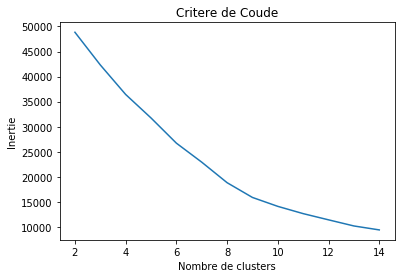

best score is :  0.5214767122612184 For  [10]  clusters
For n_clusters = 2 The average silhouette_score is : 0.5566247144480112
For n_clusters = 3 The average silhouette_score is : 0.7030317030486714
For n_clusters = 4 The average silhouette_score is : 0.42580732592903564
For n_clusters = 5 The average silhouette_score is : 0.4806105495047996
For n_clusters = 6 The average silhouette_score is : 0.4731343188032459
For n_clusters = 7 The average silhouette_score is : 0.4632475771303466
For n_clusters = 8 The average silhouette_score is : 0.4499921996840552
For n_clusters = 9 The average silhouette_score is : 0.44647340746725483
For n_clusters = 10 The average silhouette_score is : 0.44674326822440147
For n_clusters = 11 The average silhouette_score is : 0.4394745057258541
For n_clusters = 12 The average silhouette_score is : 0.446091598129707
For n_clusters = 13 The average silhouette_score is : 0.41677536572429164
For n_clusters = 14 The average silhouette_score is : 0.423200905628297


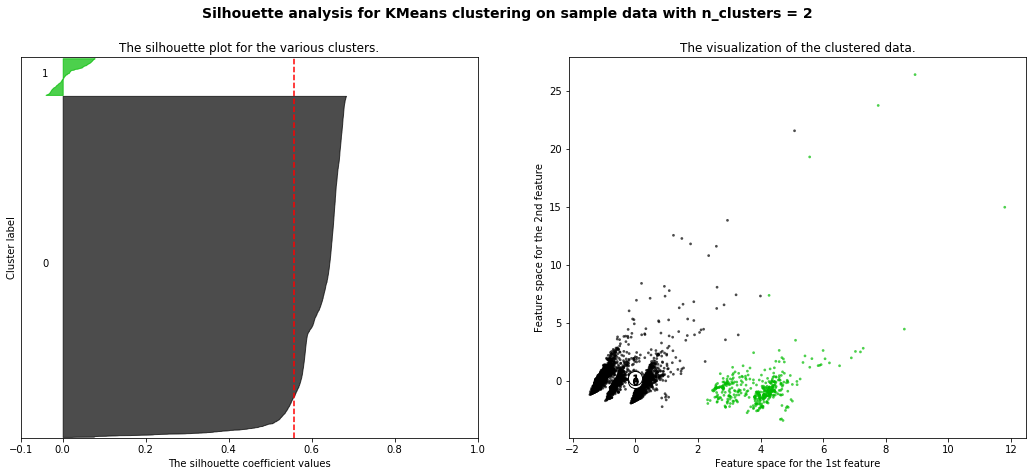

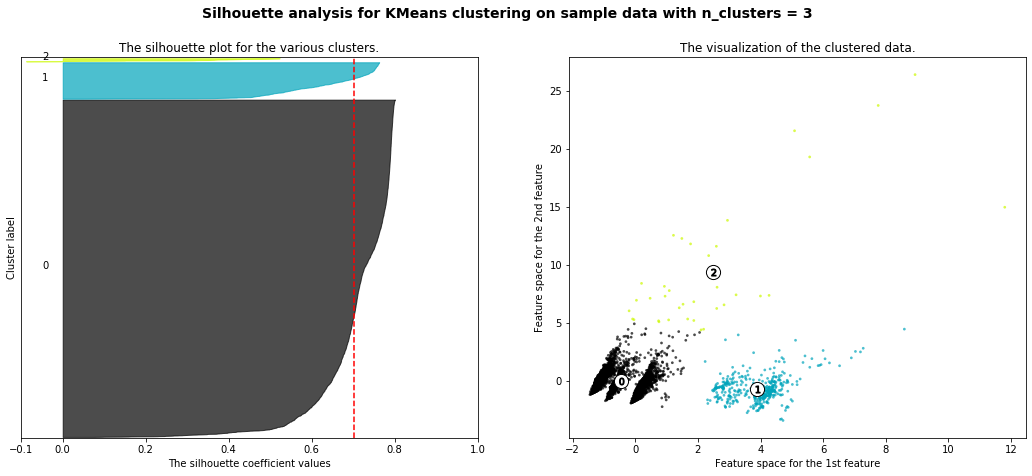

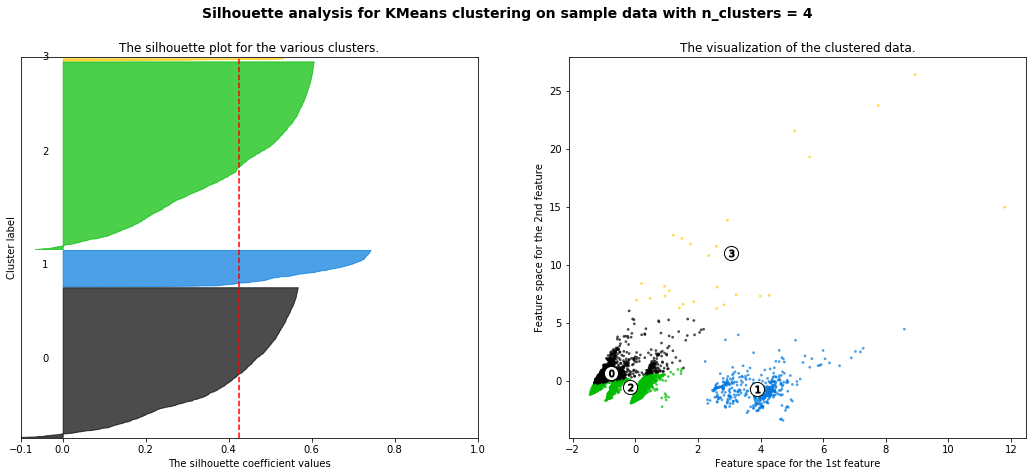

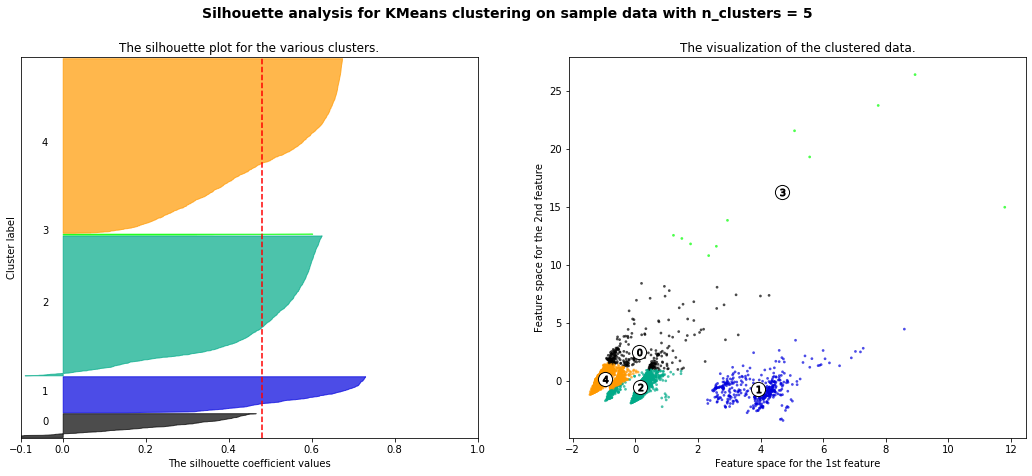

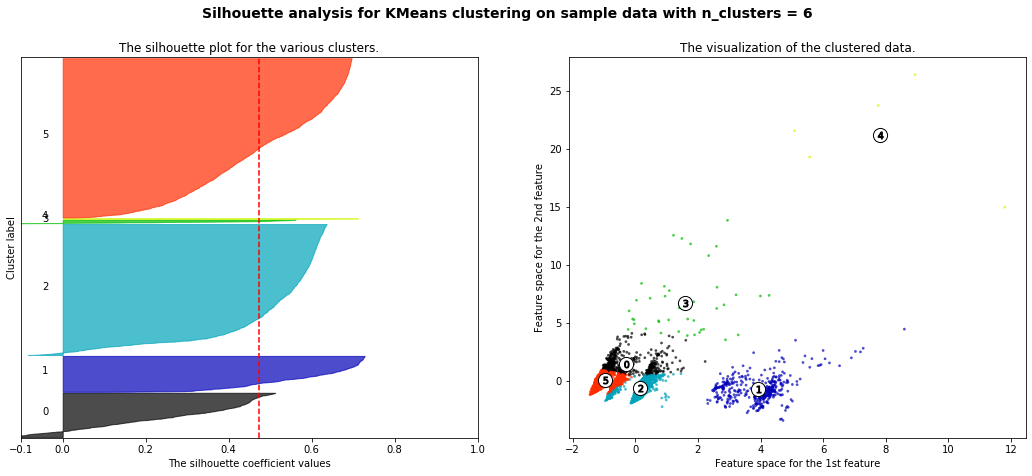

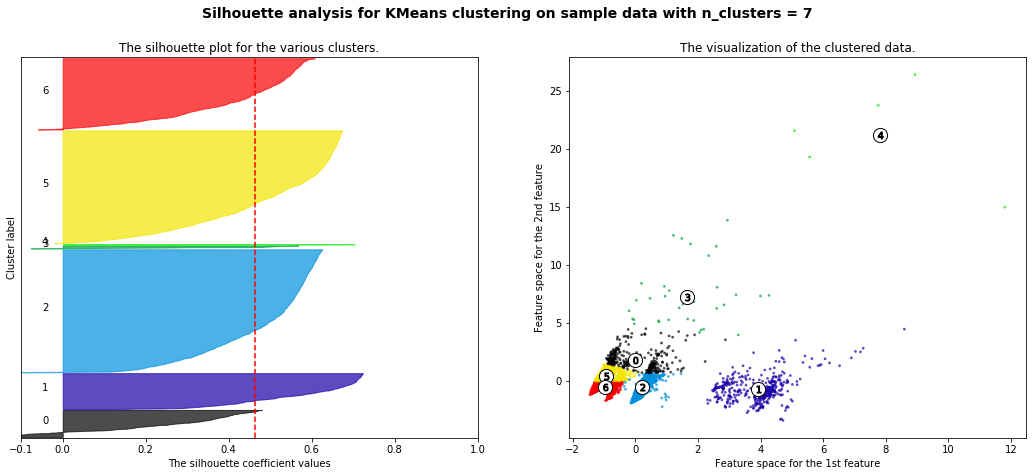

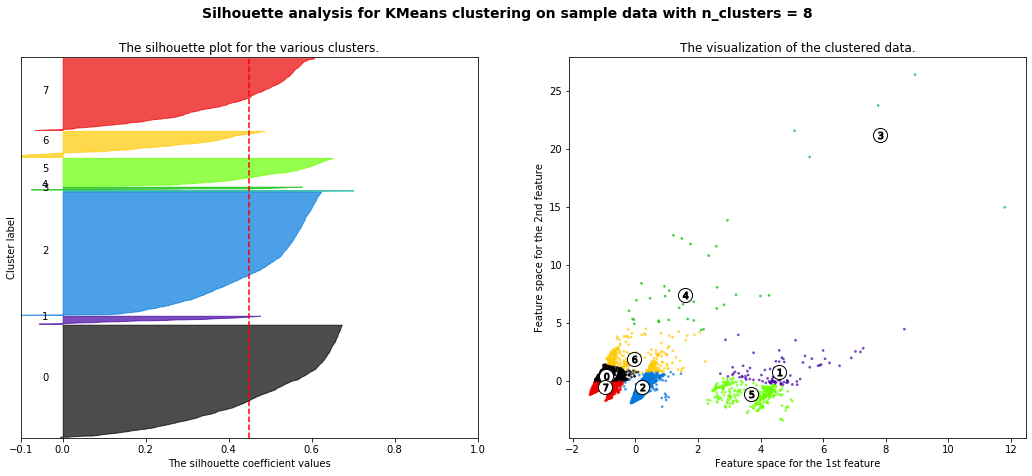

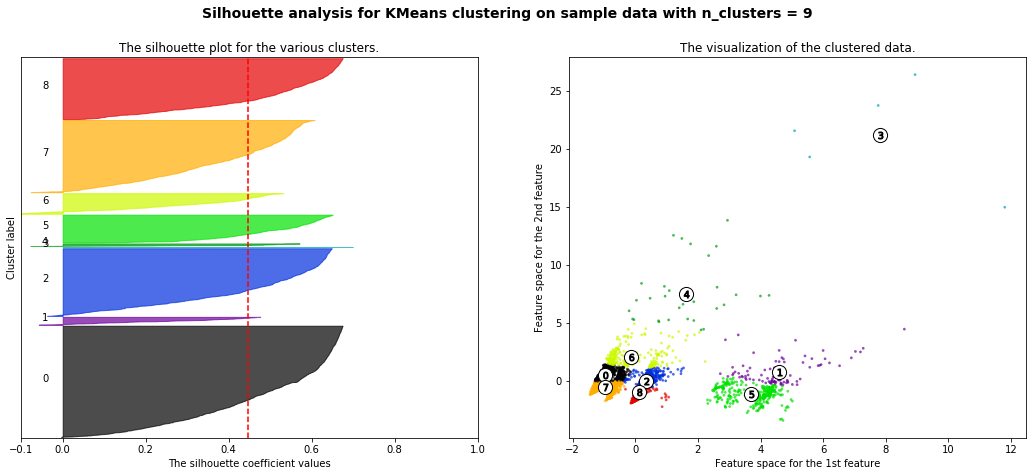

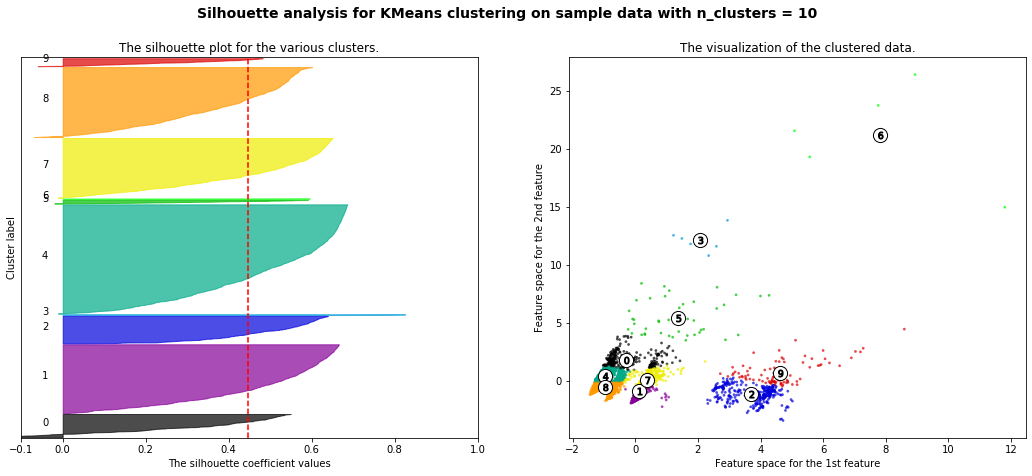

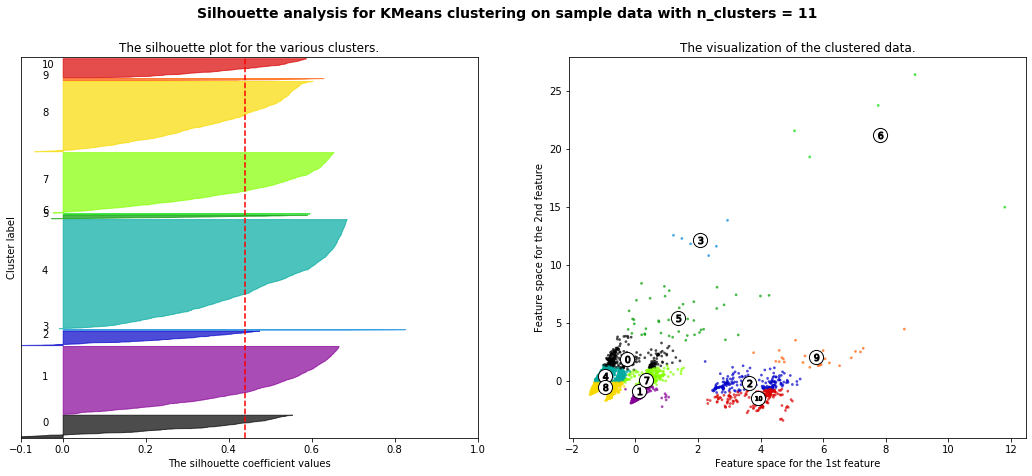

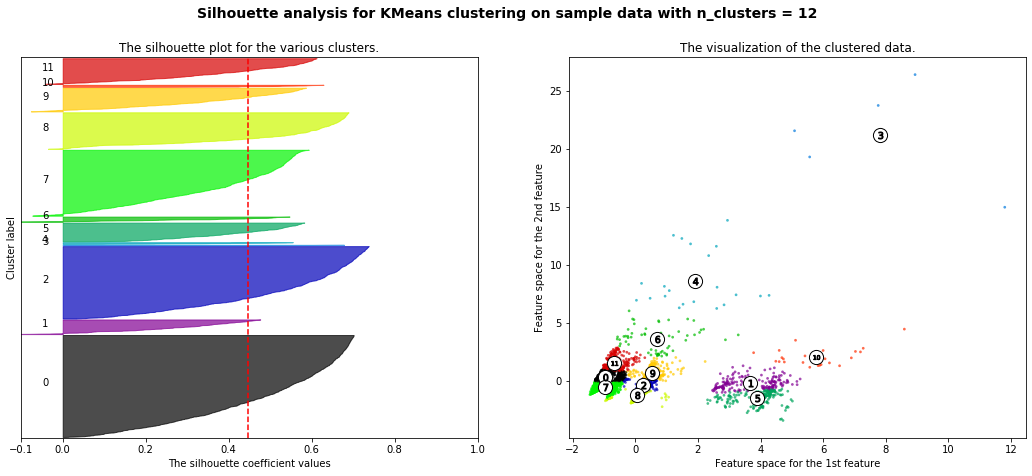

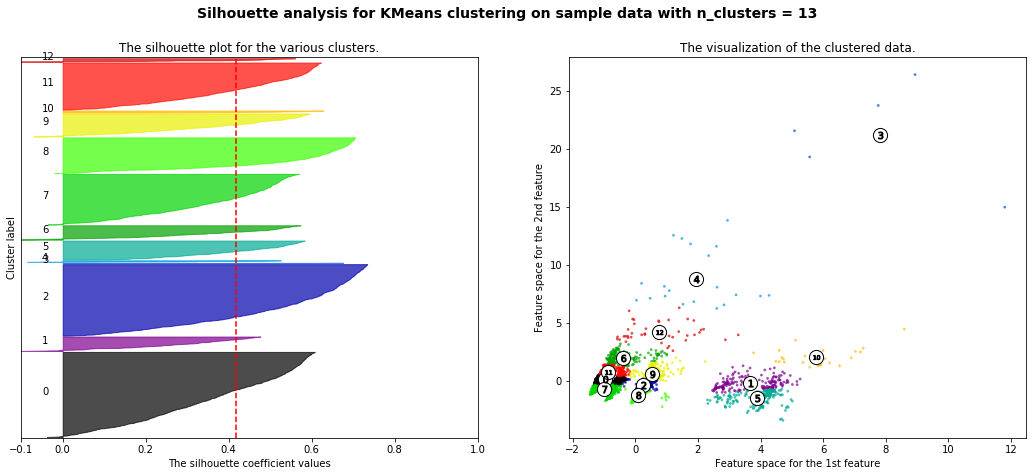

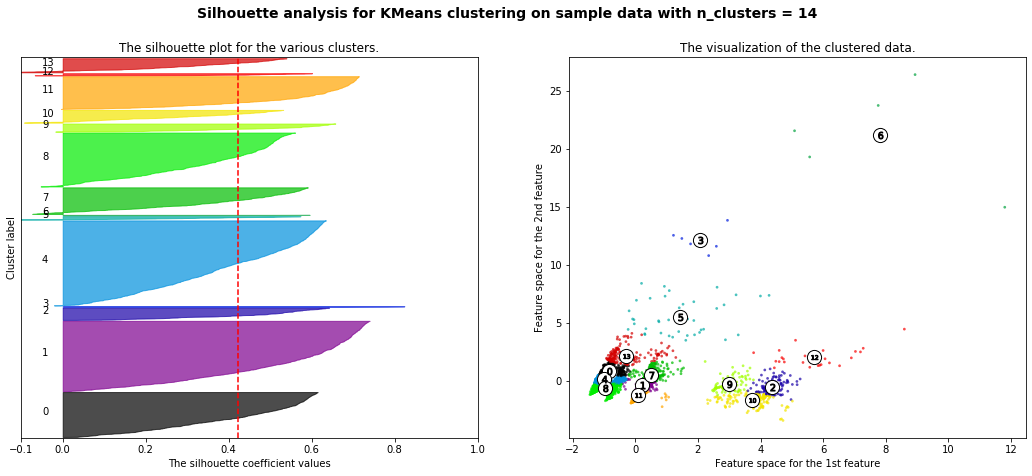

In [30]:
critere_coude(X,start=2,end=15,step=1)
silhouette_score_describe(X,start=2,end=15,step=1)

Après observation du critère de silhouette, on choisit malgré une inertie à 8 , un nombre de 5 clusters étant donné que c'est le score du critère de silhouette le plus élèvé (=0.48) en dehors du nb_cluster = 2 et 3.

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5)
kmeans.fit(np_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
labels = kmeans.labels_
labels

array([3, 3, 3, ..., 1, 2, 1])

In [33]:
df_jointure['label'] = labels
print(df_jointure['label'].unique())

[3 1 4 0 2]


In [34]:
df_scaled = pd.DataFrame(data = np_scaled , columns = columns_jointure_beforelabels)
df_scaled['label'] = labels
df_scaled.head()

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom,label
0,-0.888664,0.287834,0.190621,0.404759,0.770311,-0.840030,-0.445908,1.183639,-0.062877,-0.143413,-0.149195,4.167759,-3.062255,3
1,-0.154045,-0.015752,-0.113326,-0.050951,0.317034,1.190434,-0.445908,-0.844852,-0.062877,-0.143413,-0.149195,4.167759,-3.062255,3
2,-0.727652,-0.020547,-0.191252,-0.506662,3.880612,1.190434,-0.445908,-0.844852,-0.062877,-0.143413,-0.149195,4.167759,-3.062255,3
3,2.210826,-0.192489,-0.191252,-0.506662,0.004025,1.190434,-0.445908,-0.844852,-0.062877,-0.143413,-0.149195,4.167759,-3.062255,3
4,-0.546513,-0.046177,0.046103,0.404759,-0.305490,-0.840030,-0.445908,1.183639,-0.062877,-0.143413,-0.149195,4.167759,-3.062255,3


## 4.3 - Etude de la segmentation client (labels) 

Nous allons tenter de définir chacun des labels, c'est à dire chacun des segments, pour voir comment se comportent les consommateurs qui les composent.

### 4.3.1 Répartition des clients et fonctions

Text(0.5, 1.0, 'Répartition des populations de clients selon les labels')

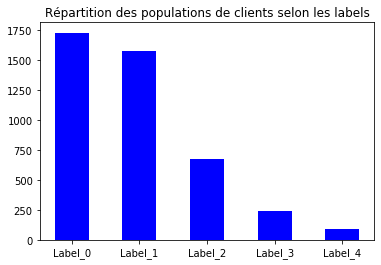

In [36]:
df_client0 = len(df_jointure[df_jointure["label"]==0])
df_client1 = len(df_jointure[df_jointure["label"]==1])
df_client2 = len(df_jointure[df_jointure["label"]==2])
df_client3 = len(df_jointure[df_jointure["label"]==3])
df_client4 = len(df_jointure[df_jointure["label"]==4])
list_nb_cust = [df_client0, df_client1, df_client2, df_client3,df_client4]
plt.bar(range(1,len(list_nb_cust)+1), list_nb_cust, width = 0.5, color = 'blue')
plt.xticks(range(1,len(list_nb_cust)+1), ['Label_0', 'Label_1', 'Label_2', 'Label_3','Label_4'])
plt.title("Répartition des populations de clients selon les labels")

Les labels 0 et 1 regroupent chacun plus de 1500 clients soit plus de 3/4 des données. les labels 2 et 3 regroupent à eux deux environ 1000 clients (700 et 300 respectivement) et le label 4 est très peu peuplé (moins de 100).

### On définit des fonctions pour faciliter le travail de l'étude de la segmentation client.

In [38]:
def seg_describe(df):
    df_describe = df.describe()
    return df_describe

In [44]:
def seg_label(i):
    df = df_jointure[df_jointure["label"]==i]
    df = df.drop("label",axis=1)
    return(df)

In [40]:
def seg_recency(df):
    df_recency = df.Recency
    plt.boxplot(df_recency)
    plt.title('Boxplot Recency')

In [41]:
def seg_frequency(df,lim=0):
    df_frequency = df.Frequency

    plt.subplot(121)
    plt.boxplot(df_frequency)
    plt.title('Boxplot Frequency')
    
    if lim != 0:
        plt.subplot(122)
        plt.boxplot(df_frequency)
        plt.ylim(0,lim)#permet d'enlever les valeurs aberrantes
        plt.title("Boxplot Frequency zoomée")

In [42]:
def seg_cat_prod(df):
    nb_cat1 = df.cat_1.sum()
    nb_cat2 = df.cat_2.sum()
    nb_cat3 = df.cat_3.sum()
    nb_cat4 = df.cat_4.sum()
    list_nb_cat = [nb_cat1, nb_cat2, nb_cat3, nb_cat4]
    plt.bar(range(1,len(list_nb_cat)+1), list_nb_cat, width = 0.5, color = 'blue')
    plt.xticks(range(1,len(list_nb_cat)+1), ['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4'])
    plt.title("Répartition des catégories de produits")

In [43]:
def seg_countries(df):
    matplotlib.axes.Axes.pie
    matplotlib.pyplot.pie

    nb_country1 = df.country_France.sum()
    nb_country2 = df.country_Germany.sum()
    nb_country3 = df["country_United Kingdom"].sum()
    nb_country4 = df.country_Other_country.sum()
    list_nb_cat = [nb_country1, nb_country2, nb_country3, nb_country4]

    labels = 'France', 'Germany', 'UK', 'Others'
    sizes = list_nb_cat

    #plt.subplot(1,2,1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.legend()
    plt.title("Pie chart des pays d'origine")
    plt.show()

    #plt.subplot(1,2,2)
    plt.bar(range(1,len(list_nb_cat)+1), list_nb_cat, width = 0.5, color = 'grey')
    plt.xticks(range(1,len(list_nb_cat)+1), ['France', 'Germany', 'United Kingdom', 'Other_country'])
    plt.title("Répartition des pays d'origine")
    plt.show()


In [49]:
import matplotlib
import matplotlib.pyplot as plt

### 4.3.2 - A - Segment 0

In [48]:
df_0 = seg_label(0)
seg_describe(df_0)

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.0,1729.0,1729.000000,1729.000000,1729.000000,1729.0,1729.0,1729.000000
mean,89.008676,1850.942643,699.413268,4.475419,317.336743,0.0,0.0,0.995951,0.004049,0.011567,0.0,0.0,0.988433
std,100.765458,6790.845665,3535.587950,7.147957,328.007512,0.0,0.0,0.063518,0.063518,0.106959,0.0,0.0,0.106959
min,0.000000,2.900000,-132.890000,1.000000,2.900000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,15.000000,300.520000,0.000000,1.000000,160.525000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,44.000000,650.430000,189.020000,2.000000,248.190000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000
75%,136.000000,1553.660000,693.100000,5.000000,374.136667,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000
max,373.000000,187482.170000,129120.070000,112.000000,7178.633333,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000


#### Recency - 0

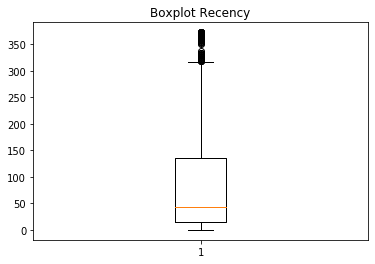

In [50]:
seg_recency(df_0)

Les valeurs de la récence du groupe sont très étalées (3/4 des valeurs entre 15 et 373). On ne peut conclure sur la récence des achats des clients. La valeur médiane est de 44.

#### Value - 0

D'après le describe précédent, la valeur médiane de Value (Valeur dépensée durant les 12 mois) est de 650.43 livres.

#### Value_last_semester - 0

D'après le describe précédent, la valeur médiane de Value last semester (Valeur dépensée durant les 3 derniers mois) est d'environ 189.02 livres.

#### Frequency - 0

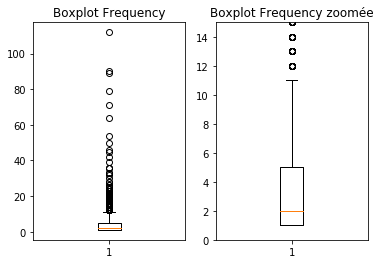

In [52]:
seg_frequency(df_0,15)

La valeur médiane de Frequency pour le label est de 2. Les clients achètent vraiment peu souvent. 

#### Categories - 0

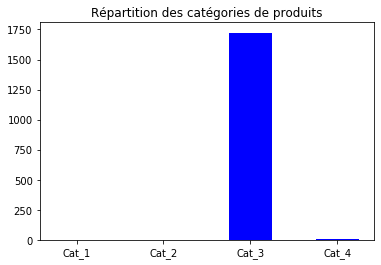

In [53]:
seg_cat_prod(df_0)

La catégories 3 (=Cadeaux pour évènements) est de loin la catégorie de produits la plus achetée par ce groupe de client.

#### Countries - 0

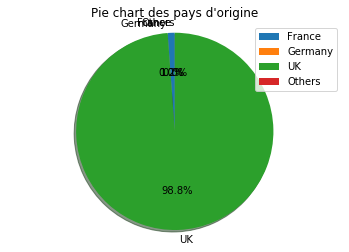

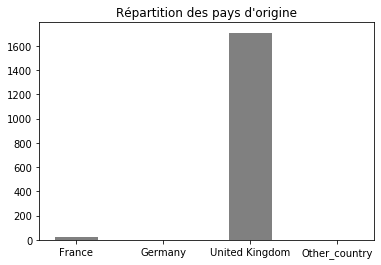

In [55]:
seg_countries(df_0)

La grande majorité des achats sont effectués par des Britaniques .

### 4.3.2 - B - Segment 1

In [64]:
df_1 = seg_label(1)
seg_describe(df_1)

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.0,1580.0,1580.0,1580.000000,1580.0,1580.0,1580.000000
mean,93.032278,1928.147177,792.567316,4.374684,315.683327,1.0,0.0,0.0,0.0,0.030380,0.0,0.0,0.969620
std,98.998760,8842.669317,3883.645847,6.847020,298.565742,0.0,0.0,0.0,0.0,0.171684,0.0,0.0,0.171684
min,0.000000,12.750000,-564.990000,1.000000,12.750000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,16.750000,296.990000,0.000000,1.000000,159.291250,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000
50%,53.000000,656.940000,132.245000,2.000000,243.757500,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000
75%,145.000000,1632.460000,664.080000,5.000000,374.275000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000
max,373.000000,279489.020000,119534.690000,145.000000,4131.233333,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000


#### Recency - 1

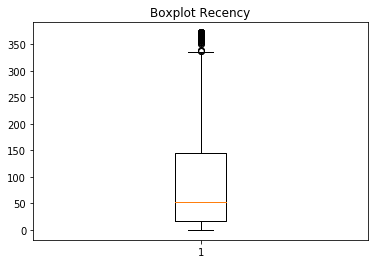

In [57]:
seg_recency(df_1)

Les valeurs de la récence du groupe sont très étalées (3/4 des valeurs entre 16.75 et 373). On ne peut conclure sur la récence des achats des clients. La valeur médiane est de 53.

#### Value - 1

D'après le describe précédent, la valeur médiane de Value (Valeur dépensée durant les 12 mois) est de 656.94 livres.

#### Value_last_semester - 1

D'après le describe précédent, la valeur médiane de Value last semester (Valeur dépensée durant les 3 derniers mois) est d'environ 132.24 livres.

#### Frequency - 1

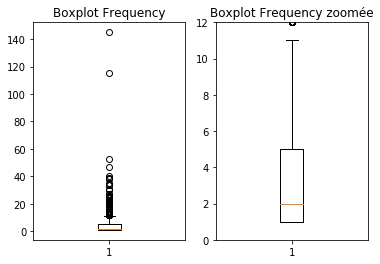

In [59]:
seg_frequency(df_1,12)

La valeur médiane de Frequency pour le label est de 2. Les clients achètent vraiment peu souvent. 

#### Categories - 1

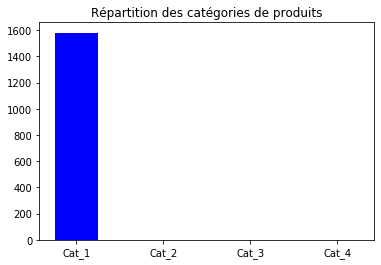

In [60]:
seg_cat_prod(df_1)

La catégories 1 (=Objets artistiques) est la seule catégorie de produits achetée par ce groupe de client.

#### Countries - 1

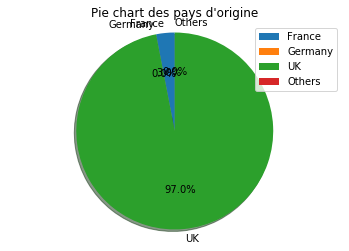

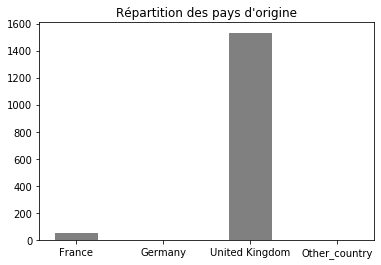

In [62]:
seg_countries(df_1)

La grande majorité des achats sont effectués par des Britaniques .

### 4.3.2 - C - Segment 2

In [63]:
df_2 = seg_label(2)
seg_describe(df_2)

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.0,676.0,676.0,676.0,676.000000,676.0,676.0,676.000000
mean,88.309172,1849.584068,443.551302,4.121302,294.748500,0.0,1.0,0.0,0.0,0.023669,0.0,0.0,0.976331
std,96.215425,10539.935118,1324.705631,5.314140,290.010959,0.0,0.0,0.0,0.0,0.152127,0.0,0.0,0.152127
min,0.000000,20.800000,-383.400000,1.000000,11.670000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,17.000000,272.182500,0.000000,1.000000,150.885000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.000000
50%,49.000000,602.265000,0.000000,2.000000,226.096667,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.000000
75%,133.000000,1399.117500,376.575000,5.000000,348.163750,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.000000
max,373.000000,256438.490000,17018.800000,66.000000,4136.104677,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,1.000000


#### Recency - 2

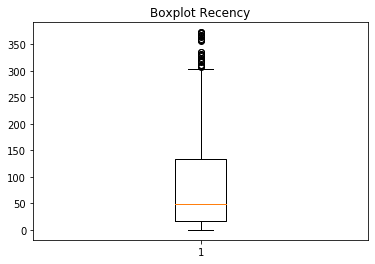

In [65]:
seg_recency(df_2)

Les valeurs de la récence du groupe sont très étalées (3/4 des valeurs entre 17 et 373). On ne peut conclure sur la récence des achats des clients. La valeur médiane est de 49.

#### Value - 2

D'après le describe précédent, la valeur médiane de Value (Valeur dépensée durant les 12 mois) est de 602.26 livres.

#### Value_last_semester - 2

D'après le describe précédent, la valeur médiane de Value last semester (Valeur dépensée durant les 3 derniers mois) est d'environ 0 livres.

In [70]:
df_2.Value_last_semester.sum()

299840.68000000005

Le segment a dépensé environ 300 000 livres lors du dernier semestre.

#### Frequency - 2

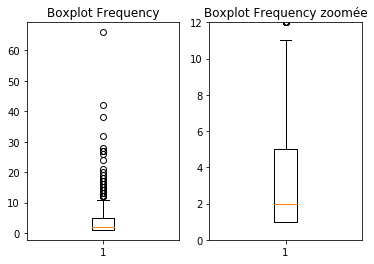

In [72]:
seg_frequency(df_2,12)

La valeur médiane de Frequency pour le label est de 2. Les clients achètent vraiment peu souvent. 

#### Categories - 2

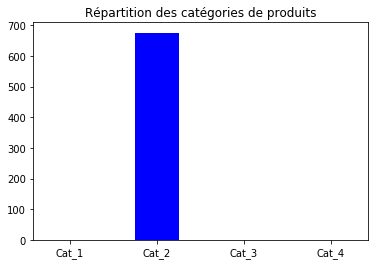

In [67]:
seg_cat_prod(df_2)

La catégories 2 (=Contenants) est la seule catégorie de produits achetée par ce groupe de client.

#### Countries - 2

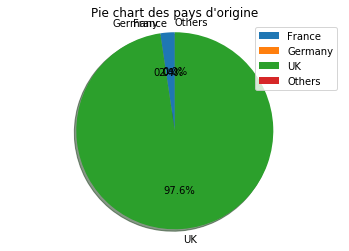

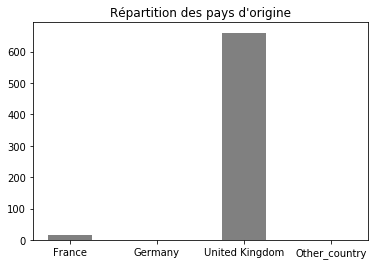

In [69]:
seg_countries(df_2)

La grande majorité des achats sont effectués par des Britaniques .

### 4.3.2 - D - Segment 3

In [73]:
df_3 = seg_label(3)
seg_describe(df_3)

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0,238.000000,238.0
mean,94.798319,2568.045168,1820.981975,3.445378,636.621979,0.609244,0.105042,0.247899,0.037815,0.012605,0.0,0.987395,0.0
std,104.934786,8386.553744,9444.162073,3.261326,841.972043,0.488948,0.307254,0.432703,0.191151,0.111797,0.0,0.111797,0.0
min,0.000000,61.750000,-60.450000,1.000000,30.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,18.000000,461.582500,0.000000,1.000000,219.375714,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
50%,51.500000,1007.785000,142.355000,2.000000,393.588333,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
75%,147.000000,2452.620000,849.160000,4.000000,665.442500,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0
max,373.000000,123725.450000,112216.520000,19.000000,6207.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


#### Recency - 3

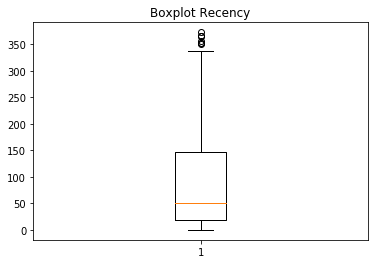

In [81]:
seg_recency(df_3)

Les valeurs de la récence du groupe sont très étalées (3/4 des valeurs entre 18 et 373). On ne peut conclure sur la récence des achats des clients. La médiane est à 51.

#### Value - 3

D'après le describe précédent, la valeur médiane de Value (Valeur dépensée durant les 12 mois) est de 1007.78 livres.

#### Value_last_semester - 3

D'après le describe précédent, la valeur médiane de Value last semester (Valeur dépensée durant les 3 derniers mois) est d'environ 142.35 livres.

#### Frequency - 3

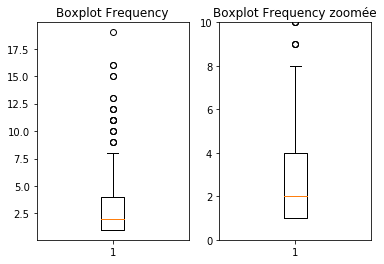

In [79]:
seg_frequency(df_3,10)

La valeur médiane de Frequency pour le label est de 2. Les clients achètent vraiment peu souvent. 

#### Categories - 3

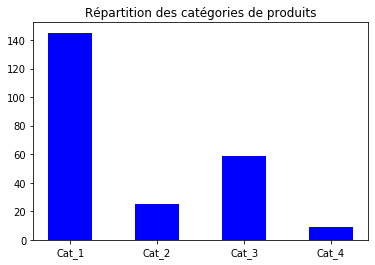

In [75]:
seg_cat_prod(df_3)

La catégories 1 (=Objets artistiques) est la catégorie de produits préférée par ce groupe de client. La catégorie 3 (=Cadeaux pour evenements) l'est dans une moindre mesure, tout comme les deux autres catégories de produits.

#### Countries - 3

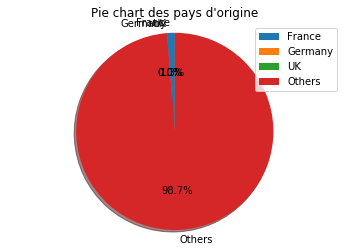

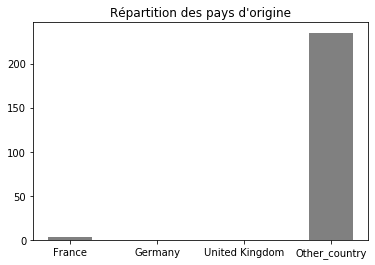

In [76]:
seg_countries(df_3)

La grande majorité des achats sont effectués dans des pays de type "autres".

### 4.3.2 - E - Segment 4

In [82]:
df_4 = seg_label(4)
seg_describe(df_4)

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.0,94.0,94.0
mean,71.404255,2268.629787,954.281596,4.893617,414.948534,0.648936,0.159574,0.180851,0.010638,0.0,1.0,0.0,0.0
std,86.363986,2959.808884,1580.869470,5.588906,251.920926,0.479862,0.368175,0.386959,0.103142,0.0,0.0,0.0,0.0
min,0.000000,73.500000,-8.850000,1.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
25%,16.250000,426.787500,0.000000,2.000000,223.962500,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
50%,30.000000,1293.770000,381.025000,3.000000,366.871786,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
75%,91.750000,2793.417500,1086.642500,6.000000,539.310595,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
max,317.000000,18740.920000,10081.220000,37.000000,1457.445556,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0


#### Recency - 4

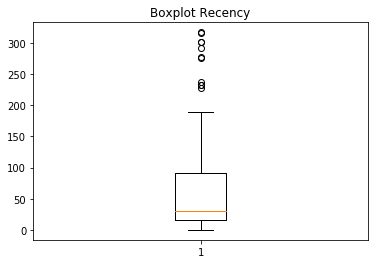

In [83]:
seg_recency(df_4)

Les valeurs de la récence du groupe sont un peu étalées. La médiane est à 30. On peut estimer que dans l'ensemble ce groupe de client a une plus faible "Recency" que les autres groupes. 

#### Value - 4

D'après le describe précédent, la valeur médiane de Value (Valeur dépensée durant les 12 mois) est de 1293.77 livres.

#### Value_last_semester - 4

D'après le describe précédent, la valeur médiane de Value last semester (Valeur dépensée durant les 3 derniers mois) est d'environ 381.02 livres.

#### Frequency - 4

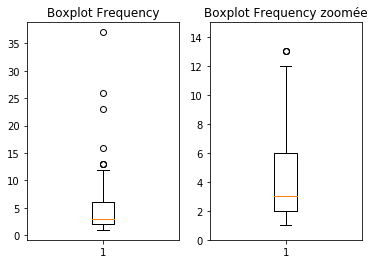

In [89]:
seg_frequency(df_4,15)

La valeur médiane de Frequency pour le label est de 3. Les clients achètent peu souvent. 

#### Categories - 4

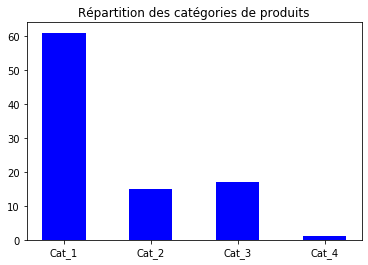

In [88]:
seg_cat_prod(df_4)

La catégories 1 (=Objets artistiques) est la catégorie de produits préférée par ce groupe de client. La catégorie 3 (=Cadeaux pour evenements) l'est dans une moindre mesure, tout comme les deux autres catégories de produits.

#### Countries - 4

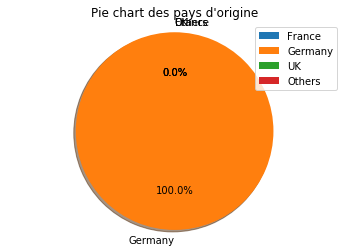

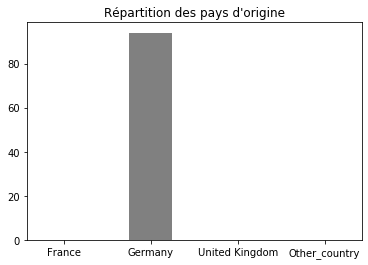

In [87]:
seg_countries(df_4)

Les achats sont effectués par des Allemands.

### 4.2.4 - transformation en df et en csv

In [90]:
#df_jointure.reset_index(df_recency.index)
df_jointure.set_index(df_recency.index, inplace = True, 
                    append = False, drop = True)
df_jointure.to_csv('categorisation_client.csv')
df_jointure

,Recency,Value,Value_last_semester,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom,label
CustomerID,,,,,,,,,,,,,,
12347,2,4310.00,1519.14,7,615.714286,0,0,1,0,0,0,1,0,3
12348,75,1797.24,310.00,4,449.310000,1,0,0,0,0,0,1,0,3
12349,18,1757.55,0.00,1,1757.550000,1,0,0,0,0,0,1,0,3
12350,310,334.40,0.00,1,334.400000,1,0,0,0,0,0,1,0,3
12352,36,1545.41,944.23,7,220.772857,0,0,1,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,277,180.60,0.00,1,180.600000,0,1,0,0,0,0,0,1,2
18281,180,80.82,0.00,1,80.820000,0,1,0,0,0,0,0,1,2
18282,7,176.60,0.00,3,58.866667,1,0,0,0,0,0,0,1,1


# 5 - Comportement lors de leurs 3 premières semaines de consommation

In [91]:
df = pd.read_csv("Online_Retails_Catégorisation.csv", sep = ';')

df.head(10)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CA,Catégorie
0,17850,536365,85123A,"['hanging', 'heart', 'light', 'holder']",6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,Objets de creation
1,17850,536365,71053,"['metal', 'lantern']",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Objets de creation
2,17850,536365,84406B,"['cupid', 'heart', 'coat', 'hanger']",8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,Objets artistiques
3,17850,536365,84029G,"['knitted', 'union', 'flag', 'hot', 'water', '...",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Contenants
4,17850,536365,84029E,"['woolly', 'hottie', 'heart']",6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,Objets artistiques
5,17850,536365,22752,"['babushka', 'nesting', 'box']",2,2010-12-01 08:26:00,7.65,United Kingdom,15.30,Objets artistiques
6,17850,536365,21730,"['glass', 'star', 'frosted', 'light', 'holder']",6,2010-12-01 08:26:00,4.25,United Kingdom,25.50,Contenants
7,17850,536366,22633,"['hand', 'warmer', 'union', 'jack']",6,2010-12-01 08:28:00,1.85,United Kingdom,11.10,Cadeaux pour evenements
8,13047,536367,84879,"['assorted', 'colour', 'bird', 'ornament']",32,2010-12-01 08:34:00,1.69,United Kingdom,54.08,Objets artistiques
9,13047,536367,22745,"['poppy', 'playhouse', 'bedroom']",6,2010-12-01 08:34:00,2.10,United Kingdom,12.60,Objets de creation


In [92]:
#Changement du type de InvoiceDate de string à datetime pour faciliter les calculs suivants + suppression de l'H-m-s car pas utiles
import datetime
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0])
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d') )

## 5.1 - Restreindre les observations aux 3 premières semaines de consommations propres à chaque client


In [93]:
#On récupère la date à laquel le client a consommé la première fois 
df_CustIDnodupl_firstDate = df.drop_duplicates(subset=['CustomerID'],keep='first')

#on élimine les colonnes en trop
df_CustIDnodupl_firstDate = df_CustIDnodupl_firstDate.drop(columns=['Description', 'InvoiceNo','StockCode','Quantity','UnitPrice','Country','CA','Catégorie'])

#on renomme la colonne InvoiceDate par FirstDate
df_CustIDnodupl_firstDate = df_CustIDnodupl_firstDate.rename(columns={"InvoiceDate": "FirstDate"})

#on merge sur le df initial pour lui ajouter la colonne FirstDate
df_firstDate = df.merge(df_CustIDnodupl_firstDate, on = 'CustomerID')

#on ajoute la colonne diff_date pour voir combien de jour(s) il y a entre la première date et la valeur de la ligne
df_firstDate['diff_date'] = (df_firstDate['InvoiceDate'] - df_firstDate['FirstDate']).astype('timedelta64[D]')

#On filtre pour ne garder que les 3premières semaines propres à chaques individus.
df_Own3firstweeks = df_firstDate[df_firstDate['diff_date'] < 22]
df_Own3firstweeks

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CA,Catégorie,FirstDate,diff_date
0,17850,536365,85123A,"['hanging', 'heart', 'light', 'holder']",6,2010-12-01,2.55,United Kingdom,15.30,Objets de creation,2010-12-01,0.0
1,17850,536365,71053,"['metal', 'lantern']",6,2010-12-01,3.39,United Kingdom,20.34,Objets de creation,2010-12-01,0.0
2,17850,536365,84406B,"['cupid', 'heart', 'coat', 'hanger']",8,2010-12-01,2.75,United Kingdom,22.00,Objets artistiques,2010-12-01,0.0
3,17850,536365,84029G,"['knitted', 'union', 'flag', 'hot', 'water', '...",6,2010-12-01,3.39,United Kingdom,20.34,Contenants,2010-12-01,0.0
4,17850,536365,84029E,"['woolly', 'hottie', 'heart']",6,2010-12-01,3.39,United Kingdom,20.34,Objets artistiques,2010-12-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
400512,12713,581578,22993,"['pantry', 'jelly', 'mould']",12,2011-12-09,1.25,Germany,15.00,Objets artistiques,2011-12-09,0.0
400513,12713,581578,22907,"['napkin', 'pantry', 'design']",12,2011-12-09,0.85,Germany,10.20,Objets de creation,2011-12-09,0.0
400514,12713,581578,22908,"['napkin', 'apple']",12,2011-12-09,0.85,Germany,10.20,Objets de creation,2011-12-09,0.0
400515,12713,581578,23215,"['jingle', 'bell', 'heart', 'antique']",12,2011-12-09,2.08,Germany,24.96,Cadeaux pour evenements,2011-12-09,0.0


In [94]:
#verif il y a tous les customers: -> OK
len(df_Own3firstweeks['CustomerID'].unique())

4317

### 5.2 - AJOUTER LE LABEL


In [95]:
#Ajouter le label (merge)
df_labels = pd.read_csv("categorisation_client.csv", sep = ',')
df_labels_drop = df_labels.drop(columns = ['Recency','Value','Value_last_semester','Frequency','AVG_Basket','cat_1','cat_2','cat_3','cat_4','country_France','country_Germany','country_Other_country','country_United Kingdom'])
#en fait c'est plus simple si le CustomerID est juste en colonne normal pas en index rah
df_labels_drop.reset_index()
df_labels_drop

,CustomerID,label
0,12347,3
1,12348,3
2,12349,3
3,12350,3
4,12352,3
...,...,...
4312,18280,2
4313,18281,2
4314,18282,1
4315,18283,2


In [96]:
#le join ne fait que sur l'index, il faut utiliser merge
df_3sem_jointure = df_Own3firstweeks.merge(df_labels_drop, on = 'CustomerID')
df_3sem_jointure

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CA,Catégorie,FirstDate,diff_date,label
0,17850,536365,85123A,"['hanging', 'heart', 'light', 'holder']",6,2010-12-01,2.55,United Kingdom,15.30,Objets de creation,2010-12-01,0.0,2
1,17850,536365,71053,"['metal', 'lantern']",6,2010-12-01,3.39,United Kingdom,20.34,Objets de creation,2010-12-01,0.0,2
2,17850,536365,84406B,"['cupid', 'heart', 'coat', 'hanger']",8,2010-12-01,2.75,United Kingdom,22.00,Objets artistiques,2010-12-01,0.0,2
3,17850,536365,84029G,"['knitted', 'union', 'flag', 'hot', 'water', '...",6,2010-12-01,3.39,United Kingdom,20.34,Contenants,2010-12-01,0.0,2
4,17850,536365,84029E,"['woolly', 'hottie', 'heart']",6,2010-12-01,3.39,United Kingdom,20.34,Objets artistiques,2010-12-01,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121370,12713,581578,22993,"['pantry', 'jelly', 'mould']",12,2011-12-09,1.25,Germany,15.00,Objets artistiques,2011-12-09,0.0,4
121371,12713,581578,22907,"['napkin', 'pantry', 'design']",12,2011-12-09,0.85,Germany,10.20,Objets de creation,2011-12-09,0.0,4
121372,12713,581578,22908,"['napkin', 'apple']",12,2011-12-09,0.85,Germany,10.20,Objets de creation,2011-12-09,0.0,4
121373,12713,581578,23215,"['jingle', 'bell', 'heart', 'antique']",12,2011-12-09,2.08,Germany,24.96,Cadeaux pour evenements,2011-12-09,0.0,4


## 5.3 - Création des indicateurs pour les 3 semaines

3 critères de distinction entre clients : 
- Value : Le total dépensé 
- AVG_Basket : Combien le client dépense en moyenne par facture
- nb_purchase : Combien de facture(s)/client sur toute la période (peut être modifié pour établir sur une période donnée)
- Category : la catégorie de produit que le client préfère (en dummies)
- Country : Là d'où vient le client (en dummies / on récupère la country_list faite dans partie 4)

### 5.3.1 - Value customer

In [97]:
#Combien a consommé chaque client 
value_custo = df_3sem_jointure.groupby(by = ['CustomerID'], as_index=True).apply(lambda x : sum(x['CA']))
value_custo

CustomerID
12347     711.79
12348     892.80
12349    1757.55
12350     334.40
12352     421.05
          ...   
18280     180.60
18281      80.82
18282      98.76
18283     215.00
18287     765.28
Length: 4317, dtype: float64

### 5.3.2 - Catégorie préférée

In [98]:
#Initialisation pour trouver catégorie préférée

category = df_3sem_jointure.groupby(by = ['CustomerID', 'Catégorie'], as_index=True).apply(lambda x : x['Catégorie'].count())
category_max = category.groupby(by = ['CustomerID','Catégorie']).max()

#GROSSE GALERE MAIS CA MARCHE
all_values = []
for value in category_max:
    all_values.append(value)
all_values

CustomerID_list = []
Category_list = []
Value_list = []
maximum = 0
customerId1 = category_max.index[0][0]
i=0
categorie = 0
for customer in category_max.index:
    
    customerId2 = customer[0]
    val = all_values[i]
    
    if customerId2 != customerId1:
        Value_list.append(maximum)
        maximum = 0
        
        CustomerID_list.append(customerId1)
        customerId1 = customerId2
        
        Category_list.append(categorie)
        
    else :
        if maximum < val:
            maximum = val
            categorie = customer[1]
            
    if i == 4316:
        Value_list.append(maximum)
        CustomerID_list.append(customerId1)
        customerId1 = customerId2
        maximum = 0
        Category_list.append(categorie)
    i+=1

    
print("taille de la liste category preferee")
len(Category_list)

taille de la liste category preferee


4317

### 5.3.3 - nombre de factures

In [99]:
#Nombre d'achats sur les 3 premières semaines
df_nb_factures = df_3sem_jointure.sort_values(by=['CustomerID']).drop_duplicates(subset=['CustomerID','InvoiceNo'])
df_nb_factures =  df_nb_factures.groupby('CustomerID').CustomerID.count()
df_nb_factures

CustomerID
12347    1
12348    1
12349    1
12350    1
12352    2
        ..
18280    1
18281    1
18282    2
18283    2
18287    1
Name: CustomerID, Length: 4317, dtype: int64

### 5.3.4 - Panier moyen

In [100]:
#Dernier critère : La moyenne de ce qu'il dépense à chaque facture : panier moyen
panier_moy_par_facture = df_3sem_jointure.groupby(by = ['CustomerID', 'InvoiceNo'], as_index=True).apply(lambda x : sum(x['CA']))
panier_moy = panier_moy_par_facture.groupby(by = ['CustomerID']).mean()
panier_moy

CustomerID
12347     711.790
12348     892.800
12349    1757.550
12350     334.400
12352     210.525
           ...   
18280     180.600
18281      80.820
18282      49.380
18283     107.500
18287     765.280
Length: 4317, dtype: float64

## 5.4 - Transformation sous dataframe pour le ML

In [101]:
#Matrice client initiale
dico_cat_client_3semaines ={
       'Value' : value_custo,
       'Frequency' : df_nb_factures,
       'AVG_Basket' : panier_moy
      }
     

dico_cat_client_3semaines = pd.DataFrame(dico_cat_client_3semaines, columns = ['Value','Frequency','AVG_Basket'])

dico_cat_client_3semaines

,Value,Frequency,AVG_Basket
CustomerID,,,
12347,711.79,1,711.790
12348,892.80,1,892.800
12349,1757.55,1,1757.550
12350,334.40,1,334.400
12352,421.05,2,210.525
...,...,...,...
18280,180.60,1,180.600
18281,80.82,1,80.820
18282,98.76,2,49.380


In [102]:
#ajout de la catégorie de produits préférés
df_cat_prod_dummies_3sem = pd.get_dummies(pd.Series(Category_list), prefix='cat') 

df_cat_prod_dummies_3sem = df_cat_prod_dummies_3sem.set_index(df_recency.index)
df_cat_prod_dummies_3sem

,cat_Contenants,cat_Objets artistiques,cat_Objets de creation,cat_autres
CustomerID,,,,
12347,1,0,0,0
12348,0,1,0,0
12349,0,1,0,0
12350,0,0,1,0
12352,0,0,1,0
...,...,...,...,...
18280,1,0,0,0
18281,1,0,0,0
18282,1,0,0,0


In [103]:
#Ajout des pays d'origine
df_country_dummies = pd.get_dummies(pd.Series(Country_list),prefix='country')
df_country_dummies = df_country_dummies.set_index(df_recency.index)
df_country_dummies

,country_France,country_Germany,country_Other_country,country_United Kingdom
CustomerID,,,,
12347,0,0,1,0
12348,0,0,1,0
12349,0,0,1,0
12350,0,0,1,0
12352,0,0,1,0
...,...,...,...,...
18280,0,0,0,1
18281,0,0,0,1
18282,0,0,0,1


In [104]:
df_3sem_all_indic = dico_cat_client_3semaines.join(df_cat_prod_dummies).join(df_country_dummies)
columns= list(df_3sem_all_indic.columns)
df_3sem_all_indic

,Value,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
CustomerID,,,,,,,,,,,
12347,711.79,1,711.790,0,0,1,0,0,0,1,0
12348,892.80,1,892.800,1,0,0,0,0,0,1,0
12349,1757.55,1,1757.550,1,0,0,0,0,0,1,0
12350,334.40,1,334.400,1,0,0,0,0,0,1,0
12352,421.05,2,210.525,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18280,180.60,1,180.600,0,1,0,0,0,0,0,1
18281,80.82,1,80.820,0,1,0,0,0,0,0,1
18282,98.76,2,49.380,1,0,0,0,0,0,0,1


In [105]:
df_labels_drop = df_labels_drop.set_index('CustomerID',drop = True)
df_labels_drop

,label
CustomerID,
12347,3
12348,3
12349,3
12350,3
12352,3
...,...
18280,2
18281,2
18282,1


In [106]:
dico_cat_client_3semaines = pd.merge(df_3sem_all_indic, df_labels_drop, left_index=True, right_index=True)
dico_cat_client_3semaines

,Value,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom,label
CustomerID,,,,,,,,,,,,
12347,711.79,1,711.790,0,0,1,0,0,0,1,0,3
12348,892.80,1,892.800,1,0,0,0,0,0,1,0,3
12349,1757.55,1,1757.550,1,0,0,0,0,0,1,0,3
12350,334.40,1,334.400,1,0,0,0,0,0,1,0,3
12352,421.05,2,210.525,0,0,1,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,180.60,1,180.600,0,1,0,0,0,0,0,1,2
18281,80.82,1,80.820,0,1,0,0,0,0,0,1,2
18282,98.76,2,49.380,1,0,0,0,0,0,0,1,1


In [107]:
# On transforme en CSV
dico_cat_client_3semaines.to_csv('Individualise_3semaines_indicateurs_label.csv')

# 6 - Classification client (ML)

In [108]:
df = pd.read_csv('Individualise_3semaines_indicateurs_label.csv', sep=',')
df = df.drop(['CustomerID','label'], axis = 1)
df

,Value,Frequency,AVG_Basket,cat_1,cat_2,cat_3,cat_4,country_France,country_Germany,country_Other_country,country_United Kingdom
0,711.79,1,711.790,0,0,1,0,0,0,1,0
1,892.80,1,892.800,1,0,0,0,0,0,1,0
2,1757.55,1,1757.550,1,0,0,0,0,0,1,0
3,334.40,1,334.400,1,0,0,0,0,0,1,0
4,421.05,2,210.525,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4312,180.60,1,180.600,0,1,0,0,0,0,0,1
4313,80.82,1,80.820,0,1,0,0,0,0,0,1
4314,98.76,2,49.380,1,0,0,0,0,0,0,1
4315,215.00,2,107.500,0,1,0,0,0,0,0,1


In [109]:
#Importation des bibliothèques nécéssaires
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from time import time


## 6.1 - Recherche des meilleurs hyperparamètres avec GridSearch

In [110]:
def pipeline_fonction_avec_gridsearch(classifier):
    
    
    # paramètres GridSearch pour les Classifieurs 
    if classifier == "log":
        parameters_clf = {"classifier__C": np.logspace(-8,5,15),
                          #[0.01,0.1, 1, 10, 100],
                          "classifier__penalty":['l1', 'l2']}  
    elif classifier == "rf":
        parameters_clf = {'classifier__n_estimators' : [10, 50, 100,200,500],
                          'classifier__max_features': ['auto', 'log2'], 
                          'classifier__criterion' :['gini', 'entropy']
                         } 
    elif classifier == "svm" : 
        parameters_clf = {'classifier__kernel': ['linear', 'rbf'],
                          'classifier__C':[0.01,0.1, 1, 10, 100], 
                          'classifier__gamma' : [0.01, 0.001, 0.0001]}
    else : 
        return "Le classifieur spécifié n'est pas traité !"
    
    
    # définition du classifier 
    if classifier == "log": 
        clf = LogisticRegression()
    elif classifier == "rf":
        clf = RandomForestClassifier()
    elif classifier == "svm" : 
        clf = SVC() 
    else : 
        return "Le classifieur spécifié n'est pas traité !"
    
    
    # Création du Pipeline
    print("Crération du pipeline avec le classifieur %s ..." % classifier)
    pipeline = Pipeline([('classifier', clf)])
    
    # Constuire l'objet GridSearchCV 
    # Définition de la liste compète des paramèters (hyperparamètres) de la GridSearchCV
    gridParameters = dict()
    
    gridParameters.update(parameters_clf)
    
    
    # Création de l'objet GridSearch Associé 
    # P.S : n_jobs (nbre de processus à exécuter en parallèle ; n_jobs = -1 --> utiliser tous les processus du PC si celui-ci le permet)
    # P.S: Score d'évaluation "roc_auc" pour prendre en compte le taux de faux postifs, en plus du taux des vrais positifs 
    # verbose = 1: pour afficher quelques messages --> permet le suivi de l'avancement de l'algo
    #Ici CV = 7
    gs = RandomizedSearchCV(pipeline, param_distributions=gridParameters, verbose=1, cv=7, n_jobs=1)

    # return l'objet GridSearch
    return gs


In [111]:
import warnings
warnings.filterwarnings("ignore")
# On va comparer la performance de 3 algorithmes  de ML différents (logisticRegression; RandomForest; SVM)
# Pour chaque algorithme , on fera appel à GridSearch pour optimiser ses hyperparamètres

# Création des différents pipelines nécéssaires 

gs_rf = pipeline_fonction_avec_gridsearch('rf')
gs_log = pipeline_fonction_avec_gridsearch('log')
gs_svm = pipeline_fonction_avec_gridsearch('svm')

# Enregsitrement des pipelines dans une liste pour automatiser les itérations
grids = [gs_rf,
         gs_log] 
         #gs_svm]

# Dictionnaire des pipelines et des types de classificateurs pour faciliter le référencement 
grid_dict = {0: 'Random Forest',
             1: 'Logistic Regression'
             #2: 'Support Vector Machine'
            }

Crération du pipeline avec le classifieur rf ...
Crération du pipeline avec le classifieur log ...
Crération du pipeline avec le classifieur svm ...


In [112]:
#Définition de la variable cible et des caractéristiques
X = df[df.columns]
y = df_labels_drop.reset_index().drop('CustomerID',axis=1)
# Split the data : train and Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)    

In [113]:
# Fit the grid search objects
print('********* Optimisation des Modèles ML et Réglages des Hyperparamètres ....**********')
best_acc = 0.0
best_clf = 0
best_gs = ''

# Boucle pour l'évaluation des pipelines (enregistrement du meilleur Classifieur pour chaque pipeline )
for idx, gs in enumerate(grids) : 
    
    print("\n Nouvelle instane GridSearch...")
    print('Pipeline : %s' % grid_dict[idx])
    print('------------------------------------------------')
    # Entrainement du Grid Search sur le data_train
    t0 = time()
    
    gs.fit(X_train, y_train)
    print("Entrainement SearchGrid faut %0.4f" % (time() - t0))
    # Meilleur pipeline 
    best_pipe = gs.best_estimator_
    
    # Meilleur paramètres et score 
    print('Meilleur Score CV d\'entrainement (accuracy): %.4f' % gs.best_score_)   
    print('Meilleur ensemble de paramètres: %s' % gs.best_params_)
    
    # Prédire les donnes de Test avec le meilleur classifieur
    y_pred = best_pipe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('Score "accuracy" ur les données de Test avec le meilleur pipeline : %0.4f ' % acc_score )
    print('\n')
    
    # Afficher d'autres métriques significatives
    print('Matrice de Confusion :')
    print(confusion_matrix(y_test, y_pred))
    print("Rapport de Classification sur les donénes de Test")
    print(classification_report(y_test,y_pred))   
    
    
    #  Suivi du meilleur modèle (AUC ROC la plus élevée)
    if acc_score > best_acc: 
        best_acc = acc_score
        best_gs = gs 
        best_clf = idx 
    

********* Optimisation des Modèles ML et Réglages des Hyperparamètres ....**********

 Nouvelle instane GridSearch...
Pipeline : Random Forest
------------------------------------------------
Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   36.5s finished


Entrainement SearchGrid faut 36.8237
Meilleur Score CV d'entrainement (accuracy): 0.9997
Meilleur ensemble de paramètres: {'classifier__n_estimators': 100, 'classifier__max_features': 'log2', 'classifier__criterion': 'gini'}
Score "accuracy" ur les données de Test avec le meilleur pipeline : 0.9954 


Matrice de Confusion :
[[160   0   0   0   0]
 [  0 154   0   0   0]
 [  0   0  77   0   0]
 [  1   1   0  27   0]
 [  0   0   0   0  12]]
Rapport de Classification sur les donénes de Test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       160
           1       0.99      1.00      1.00       154
           2       1.00      1.00      1.00        77
           3       1.00      0.93      0.96        29
           4       1.00      1.00      1.00        12

    accuracy                           1.00       432
   macro avg       1.00      0.99      0.99       432
weighted avg       1.00      1.00      1.00       432


 Nouvelle instane 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    4.1s finished


Entrainement SearchGrid faut 4.3728
Meilleur Score CV d'entrainement (accuracy): 0.9035
Meilleur ensemble de paramètres: {'classifier__penalty': 'l2', 'classifier__C': 1389.4954943731361}
Score "accuracy" ur les données de Test avec le meilleur pipeline : 0.9097 


Matrice de Confusion :
[[158   1   0   1   0]
 [  0 152   1   1   0]
 [  0   0  77   0   0]
 [ 10  10   3   6   0]
 [  3   7   2   0   0]]
Rapport de Classification sur les donénes de Test
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       160
           1       0.89      0.99      0.94       154
           2       0.93      1.00      0.96        77
           3       0.75      0.21      0.32        29
           4       0.00      0.00      0.00        12

    accuracy                           0.91       432
   macro avg       0.70      0.64      0.64       432
weighted avg       0.88      0.91      0.88       432



Text(0.5, 1, 'Accuracy Score: 0.9097222222222222')

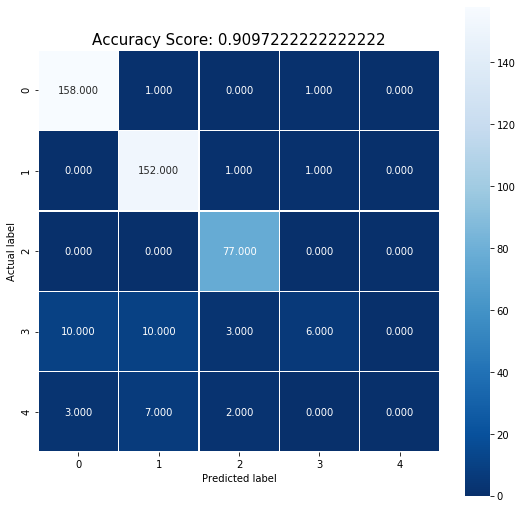

In [114]:
import seaborn as sns


lr = LogisticRegression(penalty =  'l2', C =  1389.4954943731361).fit(X_train,y_train)

y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)



## 6.2 - Choix du meilleur modèle

In [115]:
print('\n Le Modèle avec les meilleurs performances est: %s' % grid_dict[best_clf])


 Le Modèle avec les meilleurs performances est: Random Forest


Nous utilisons le modèle de Logistic Regression finalement car le modèle de Random Forest nous donne une accuracy de 99% ce qui montre qu'il y a eu de l'over-fitting. De plus l'accuracy du modèle de Logistic Regression est très satisfaisant : ~90%

Chargement du modèle sous format Pickel 

In [116]:
import pickle

def load_model():
    
    #saving model to disk
    pickle.dump(lr, open('model_final.pkl','wb'))
    
    #loading model to compare the result
    model = pickle.load(open('model_final.pkl','rb'))

load_model()
   